# EDA Chicago400 Notebook

In [54]:
# import necessary packages
import geopandas as gpd
import pandas as pd
import pickle
import numpy as np
import os
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [55]:
# import pickled gdf for eda
bike_routes = pd.read_pickle('./data/pickle/bike_routes')
school_cook_county = pd.read_pickle('./data/pickle/school_cook_county')
daycare = pd.read_pickle('./data/pickle/daycare')
forestry = pd.read_pickle('./data/pickle/forestry')
parks = pd.read_pickle('./data/pickle/parks')
chicago_boundaries = pd.read_pickle('./data/pickle/chicago_boundaries')

In [56]:
# ensure all pickled gdf's were imported
%who GeoDataFrame

bike_routes	 chicago_boundaries	 daycare	 daycare_chicago_clip	 forestry	 gdf	 parks	 school_cook_chicago_clip	 school_cook_county	 



## Preview chicago boundaries against Chicago basemap

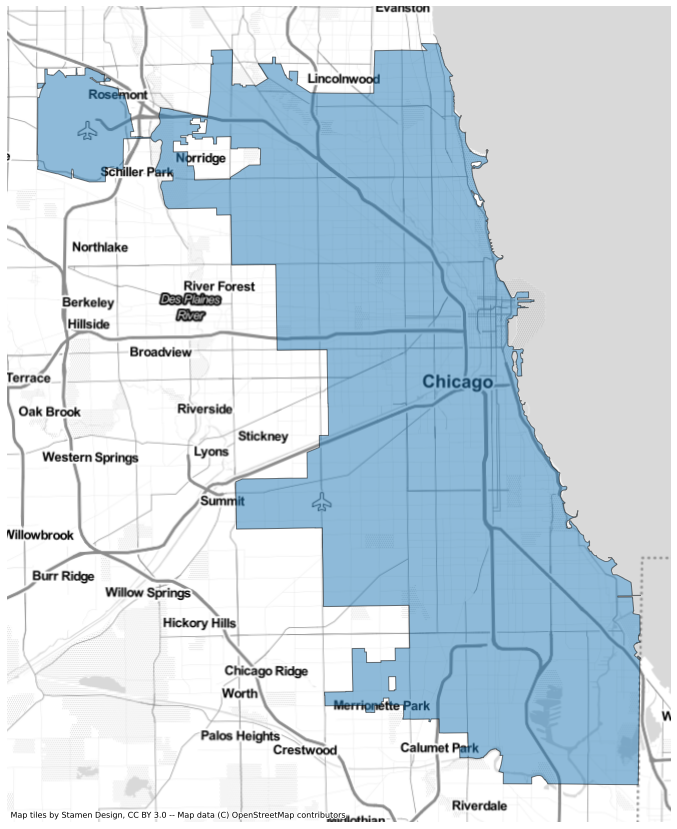

In [57]:
#add basemap with contextily
ax = chicago_boundaries.plot(figsize=(15,15), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax,crs=32616,source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

### Segment Cook County data for Chicago

#### Use Clip to segment for schools

In [58]:
school_cook_chicago_clip = gpd.clip(school_cook_county,chicago_boundaries)

In [59]:
school_cook_county.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   address     2332 non-null   object  
 1   cfname      2332 non-null   object  
 2   cfsubtype   2332 non-null   object  
 3   cftype      2332 non-null   object  
 4   comment     141 non-null    object  
 5   community   2332 non-null   object  
 6   gniscode    2332 non-null   float64 
 7   jurisdicti  2154 non-null   object  
 8   mergeid     2332 non-null   object  
 9   shape_area  2332 non-null   float64 
 10  shape_len   2332 non-null   float64 
 11  source      2332 non-null   object  
 12  geometry    2332 non-null   geometry
dtypes: float64(3), geometry(1), object(9)
memory usage: 237.0+ KB


In [60]:
school_cook_chicago_clip.head()

address                         cfname          cfsubtype  \
261         1423 E 53rd St    Priests of the Sacred Heart  Non Public School   
274  5036 S Blackstone Ave                  Just for Kids  Non Public School   
387   4833 N Francisco Ave   Lawrence Hall Youth Services  Non Public School   
411        1114 W Grace St  House of Good Shepherd School  Non Public School   
415     226 W Jackson Blvd       City Colleges of Chicago      Public School   

     cftype comment community   gniscode             jurisdicti mergeid  \
261  School    None   Chicago        0.0   PRIESTS SACRED HEART   14373   
274  School    None   Chicago        0.0                   None   14375   
387  School    None   Chicago   411869.0      LAWRENCE HALL INC   14237   
411  School    None   Chicago   410596.0   CATHOLIC BISHOP CHGO   14242   
415  School    None   Chicago  1826047.0  PUB BLDG COMM OF CHGO   14686   

       shape_area    shape_len source  \
261   24289.03040   623.849848     BG   
274    3181.41480   341.974924    AGI   
387  227209.29840  2121.893841  ABCGI   
411   96998.80385  1418.661907     CG   
415   17450.47860   542.032982     CG   

                                              geometry  
261  POLYGON ((450938.539 4627628.797, 450892.246 4...  
274  POLYGON ((450933.807 4628088.287, 450888.177 4...  
387  POLYGON ((441911.281 4646751.090, 442050.732 4...  
411  POLYGON ((445545.216 4644713.603, 445546.480 4...  
415  POLYGON ((447324.752 4636447.211, 447318.638 4...

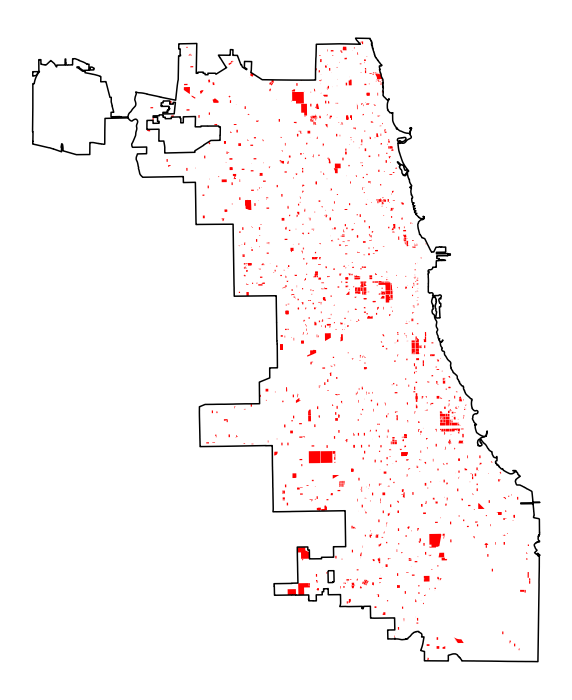

In [61]:
# clipped schools for chicago
basemap = chicago_boundaries.boundary.plot(color='k', figsize=(10,20))
school_cook_chicago_clip.plot(ax=basemap,color='red', legend=True)
basemap.axis('off')
plt.show()

In [62]:
# export to pickle
school_cook_chicago_clip.to_pickle('./data/pickle/school_cook_chicago_clip')

# export to shapefile
school_cook_chicago_clip.to_file('./data/shp/school_cook_chicago_clip')

#### Use Clip to segment Daycare Centers for Chicago

In [63]:
# clip daycare to chicago boundary
daycare_chicago_clip = gpd.clip(daycare,chicago_boundaries)

In [64]:
daycare_chicago_clip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 135 entries, 332 to 935
Columns: 119 entries, pin10 to geometry
dtypes: float64(27), geometry(1), int64(8), object(83)
memory usage: 126.6+ KB


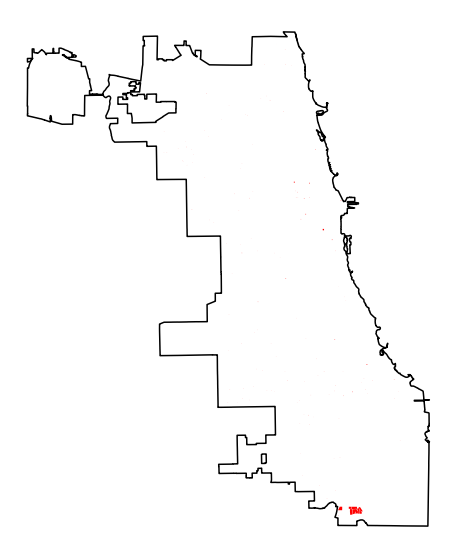

In [65]:
basemap = chicago_boundaries.boundary.plot(color='k',figsize=(20,10))
daycare_chicago_clip.plot(color='red',ax=basemap)
basemap.axis('off')
plt.show()

In [66]:
# export pickle
daycare_chicago_clip.to_pickle('./data/pickle/daycare_chicago_clip')
# export shapefile
daycare_chicago_clip.to_file('./data/shp/daycare_chicago_clip')

In [67]:
daycare_chicago_clip.head()

pin10  longitude   latitude municipali municipa_2  \
332  1036426025 -87.696363  41.998238    Chicago      14000   
349  1130322034 -87.684245  42.013735    Chicago      14000   
350  1131211018 -87.675060  42.009482    Chicago      14000   
351  1131418014 -87.674203  41.998276    Chicago      14000   
388  1309221034 -87.755651  41.975426    Chicago      14000   

              politicalt  commission  congressio  staterepre  statesenat  ...  \
332  TOWN OF ROGERS PARK        13.0         9.0        16.0         8.0  ...   
349  TOWN OF ROGERS PARK        13.0         9.0        14.0         7.0  ...   
350  TOWN OF ROGERS PARK        13.0         9.0        14.0         7.0  ...   
351  TOWN OF ROGERS PARK        10.0         9.0        13.0         7.0  ...   
388    TOWN OF JEFFERSON        10.0         5.0        19.0        10.0  ...   

    USER_Lan_1 USER_Lan_2 USER_Lan_3 USER_DayCa  USER_Nig_1  \
332    ENGLISH    ENGLISH       None          8           8   
349    ENGLISH    ENGLISH       None          8           8   
350    ENGLISH    ENGLISH       None         60           0   
351    ENGLISH    ENGLISH       None         32           0   
388    ENGLISH    ENGLISH       None         47           0   

              USER_Statu                            UIDField_1  Shape_Leng  \
332  License issued (IL)  c29ff431-c6d9-4c47-a3c9-49f1273ca22b   95.806451   
349  License issued (IL)  5cb2cc6e-c83a-43da-93c8-4282aa76e4f2   23.237687   
350  License issued (IL)  8185de30-4404-4c15-92b8-361112f180c8   92.022109   
351  License issued (IL)  70827522-c461-459a-bafc-1ca84340002c  107.208865   
388  License issued (IL)  d61cbb44-93b9-4766-a479-f1792bae7fe0  114.747099   

     Shape_Area                                           geometry  
332  373.636315  POLYGON ((442346.733 4649809.605, 442308.645 4...  
349   25.955299  POLYGON ((443349.277 4651528.185, 443349.260 4...  
350  470.326268  POLYGON ((444117.238 4651041.116, 444101.797 4...  
351  586.422720  POLYGON ((444170.890 4649784.745, 444155.576 4...  
388  714.632982  POLYGON ((437414.545 4647323.107, 437414.646 4...  

[5 rows x 119 columns]

In [68]:
%who GeoDataFrame

bike_routes	 chicago_boundaries	 daycare	 daycare_chicago_clip	 forestry	 gdf	 parks	 school_cook_chicago_clip	 school_cook_county	 



### Loop through each gdf to get basic map

In [69]:
# reset name attribute
bike_routes.name = 'bike_routes'
daycare_chicago_clip.name = 'daycare'
forestry.name = 'forestry'
parks.name = 'parks'
school_cook_chicago_clip.name = 'schools'

In [70]:
# make a list of all chicago gdf
chicago_gdf = [bike_routes, daycare_chicago_clip,forestry,parks,school_cook_chicago_clip]

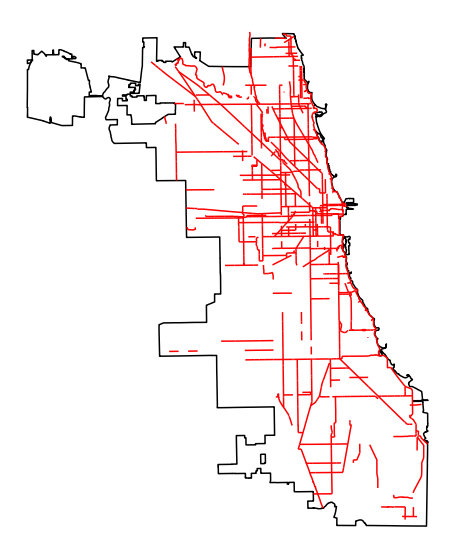

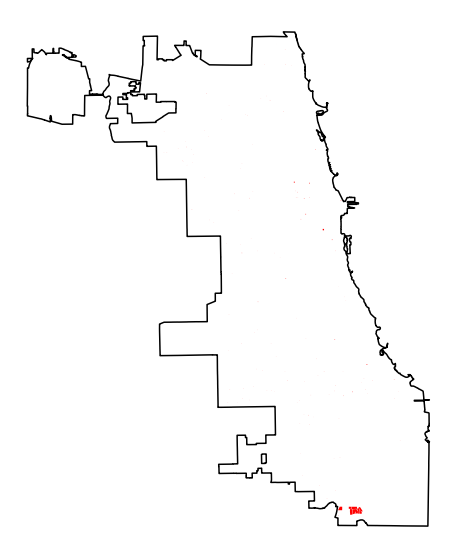

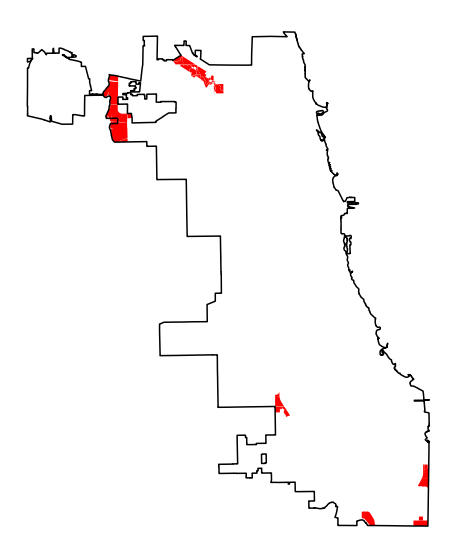

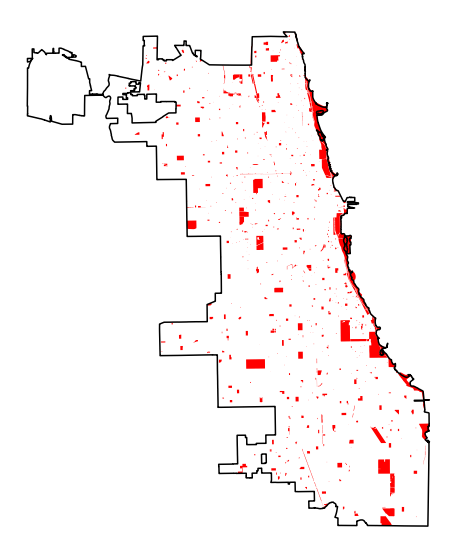

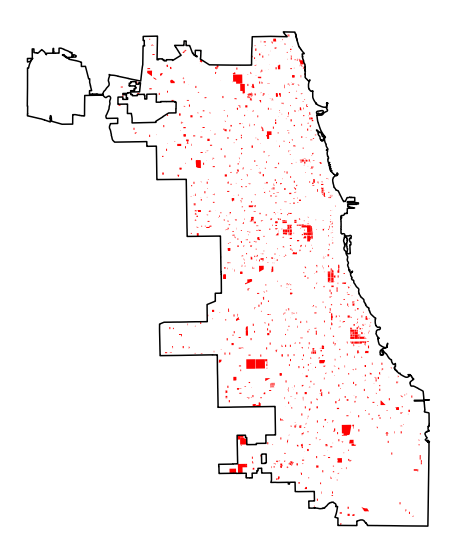

In [71]:
for gdf in chicago_gdf:
    basemap = chicago_boundaries.boundary.plot(color='k',figsize=(20,10))
    gdf.plot(color='red',ax=basemap)
    basemap.axis('off')
    plt.show()

### Combine all on one map

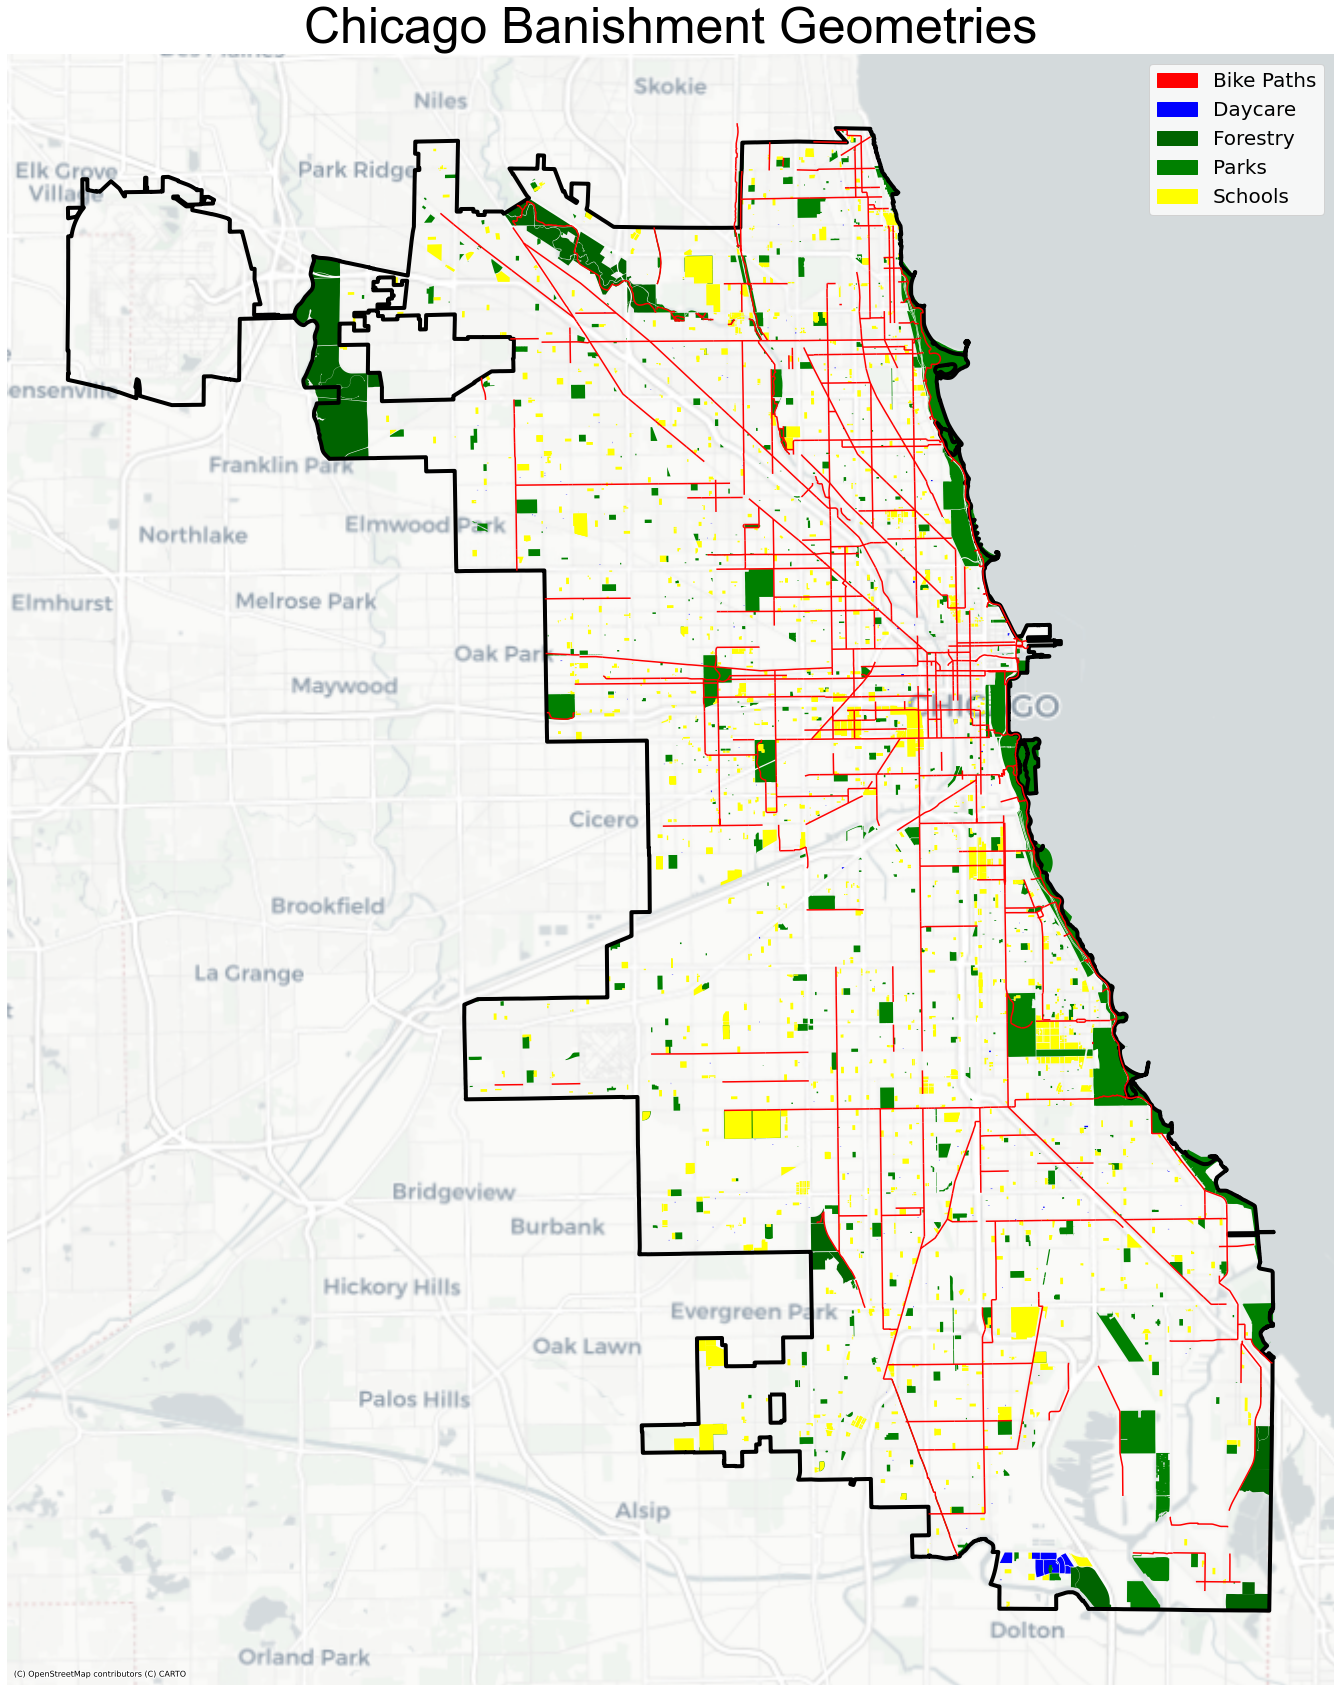

In [72]:

# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                          label='Chicago Boundary')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
bike_routes.plot(color='red',ax=basemap, label='Bike Paths')
bike_leg = mpatches.Patch(color='red', label='Bike Paths')

daycare_chicago_clip.plot(color='blue', ax=basemap)
daycare_leg = mpatches.Patch(color='blue', label='Daycare')

forestry.plot(color='darkgreen',ax=basemap)
forestry_leg = mpatches.Patch(color='darkgreen', label='Forestry')

parks.plot(color='green',ax=basemap)
parks_leg = mpatches.Patch(color='green',label='Parks')

school_cook_chicago_clip.plot(color='yellow',ax=basemap)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':20}, handles=[bike_leg,
                                          daycare_leg, 
                                          forestry_leg, 
                                          parks_leg, 
                                          schools_leg])


# set title
basemap.set_title('Chicago Banishment Geometries', fontdict={'size':50,
                                                            'weight':'normal',
                                                            'family':'arial'})
plt.show()


## Buffer each geometry
- 500 ft = 152.4 meters
- 250 ft = 76.2 meters

### Buffer

In [79]:
# buffer each gdf 500 ft (152.4 metres), 250 ft (76.2 meters) and pickle buffer for next notebook
for gdf in chicago_gdf:
    gdf['buffer_500']=gdf['geometry'].buffer(152.4)
    gdf['buffer_250']=gdf['geometry'].buffer(76.2)
    gdf.to_pickle('./data/pickle/' + gdf.name + '_buffer')

In [80]:
bike_routes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   displayrou  897 non-null    object  
 1   f_street    873 non-null    object  
 2   l_f_addr    870 non-null    object  
 3   l_t_addr    897 non-null    float64 
 4   mi_ctrline  897 non-null    float64 
 5   objectid    897 non-null    float64 
 6   oneway_dir  129 non-null    object  
 7   pre_dir     872 non-null    object  
 8   r_f_addr    897 non-null    float64 
 9   r_t_addr    897 non-null    float64 
 10  st_name     873 non-null    object  
 11  st_type     825 non-null    object  
 12  street      873 non-null    object  
 13  t_street    873 non-null    object  
 14  geometry    897 non-null    geometry
 15  buffer_500  897 non-null    geometry
 16  buffer_250  897 non-null    geometry
dtypes: float64(5), geometry(3), object(9)
memory usage: 119.3+ KB


In [75]:
# set geometry to 500 ft
for gdf in chicago_gdf:
    gdf.set_geometry('buffer_500',inplace=True)

In [23]:
# change previous geometry column to string in order to export to shapefile
for gdf in chicago_gdf:
    gdf['geometry'] = gdf['geometry'].astype(str)

# export 500 ft buffer as geometry
for gdf in chicago_gdf:
    gdf.to_file('./data/shp/' + gdf.name + '_500ft_buffer')

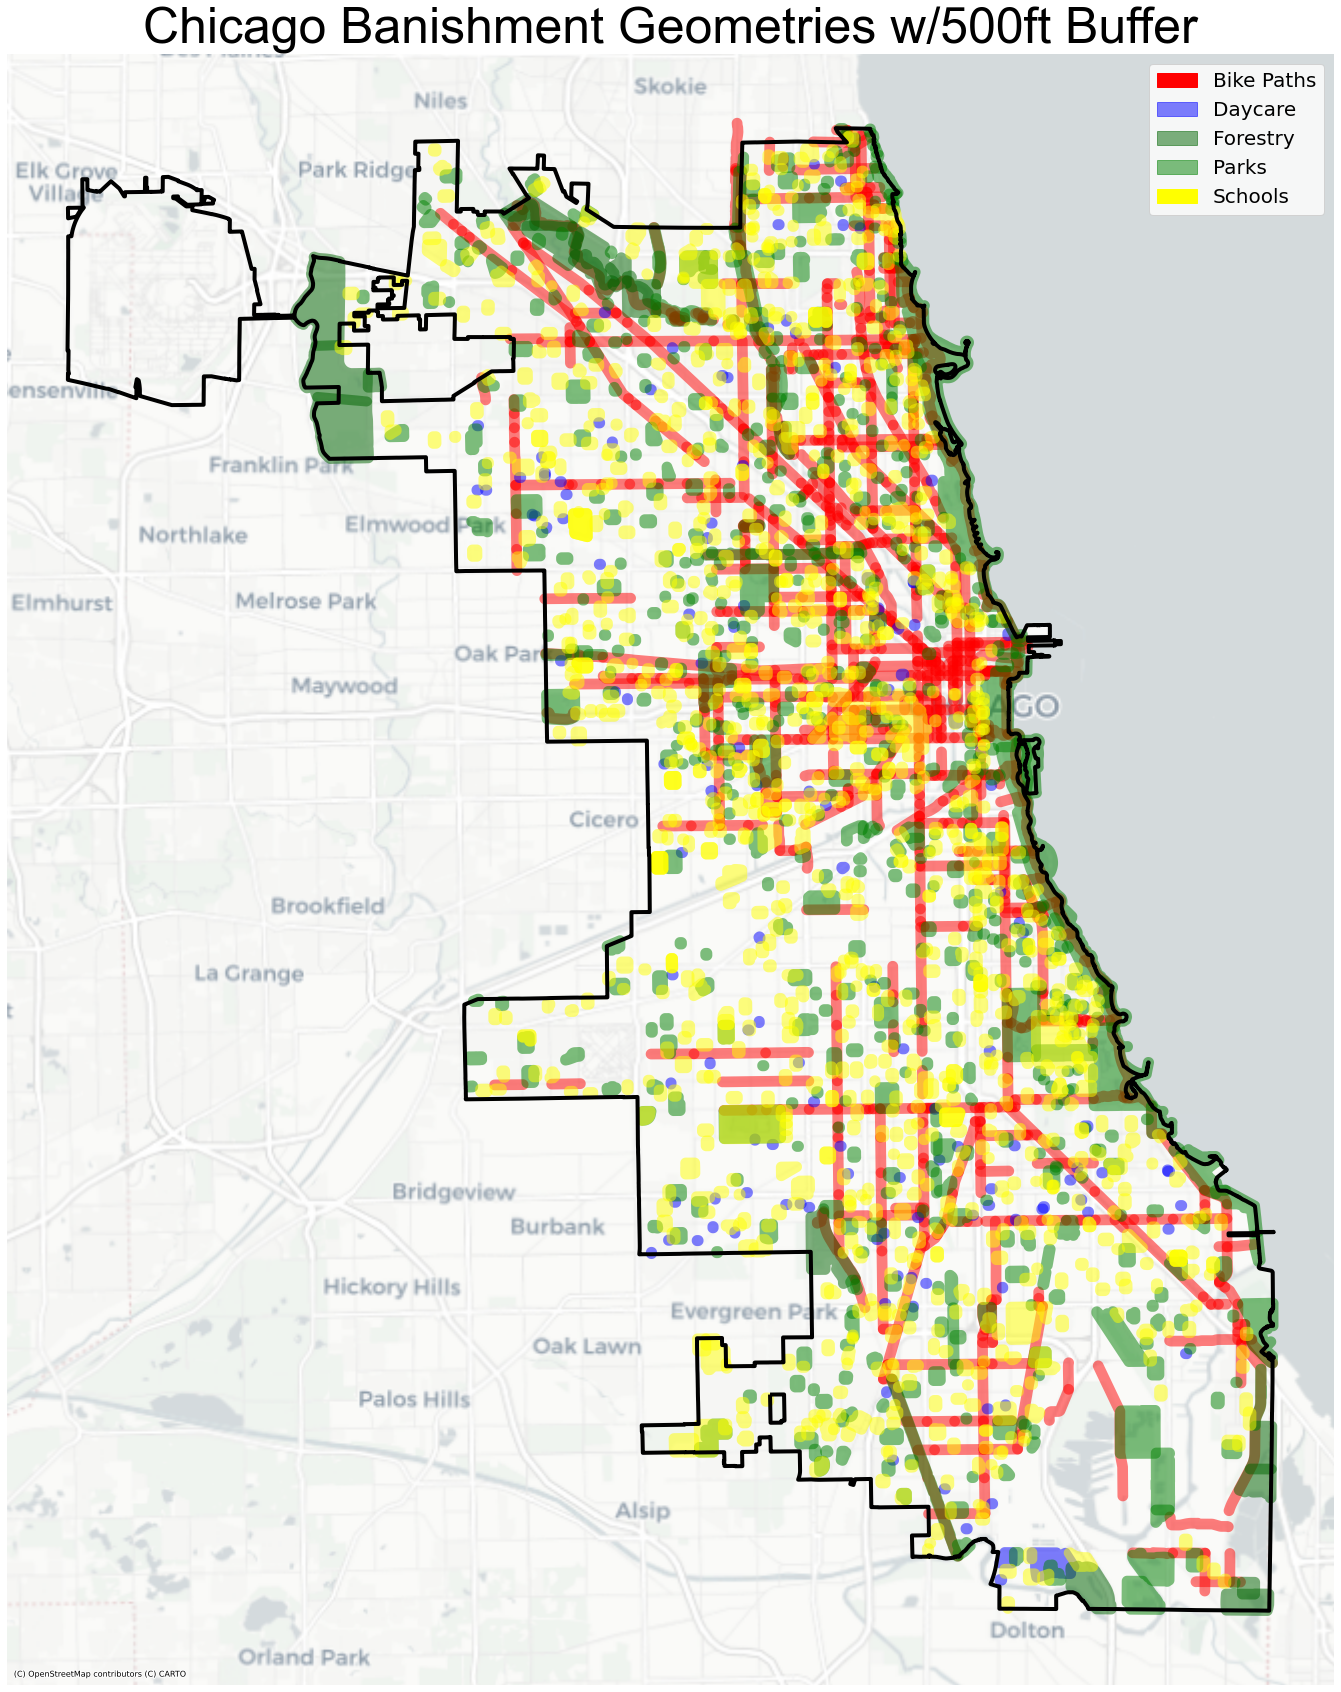

In [76]:
# 500 ft buffer map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
bike_routes.plot(color='red',ax=basemap, label='Bike Paths', alpha=0.5)
bike_leg = mpatches.Patch(color='red', label='Bike Paths')

daycare_chicago_clip.plot(color='blue', ax=basemap, alpha=0.5)
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)

forestry.plot(color='darkgreen',ax=basemap, alpha=0.5)
forestry_leg = mpatches.Patch(color='darkgreen', label='Forestry', alpha=0.5)

parks.plot(color='green',ax=basemap, alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)

school_cook_chicago_clip.plot(color='yellow',ax=basemap, alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':20}, handles=[bike_leg,
                                          daycare_leg, 
                                          forestry_leg, 
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Banishment Geometries w/500ft Buffer', fontdict={'size':50,
                                                            'weight':'normal',
                                                            'family':'arial'})
plt.show()

### Buffer - 250ft

In [77]:
# set 250 ft buffer as geometry
for gdf in chicago_gdf:
    gdf.set_geometry('buffer_250',inplace=True)

In [27]:
# change previous geometry column to string in order to export to shapefile
for gdf in chicago_gdf:
    gdf['buffer_500'] = gdf['buffer_500'].astype(str)

# export 250 ft buffer as geometry
for gdf in chicago_gdf:
    gdf.to_file('./data/shp/' + gdf.name + '_250ft_buffer')

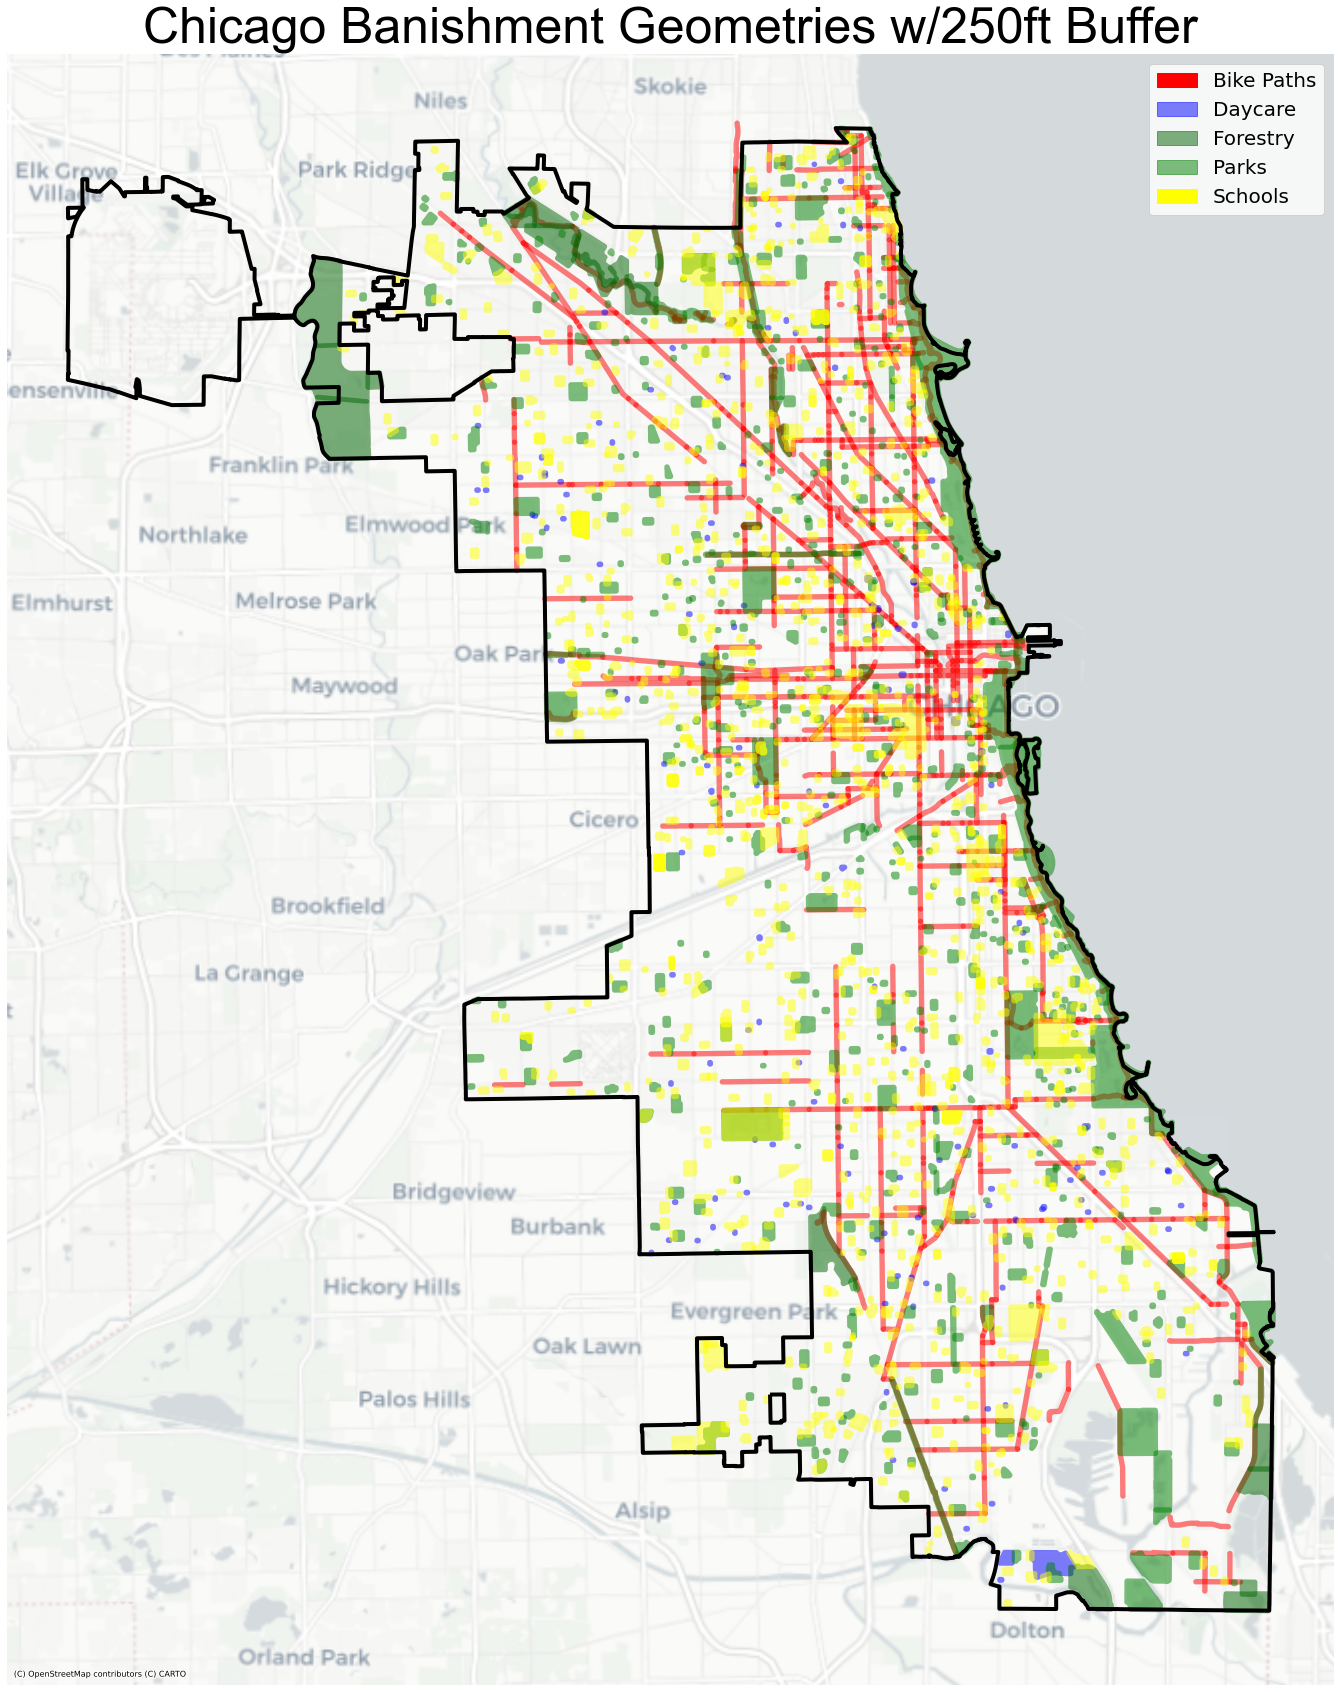

In [78]:
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
bike_routes.plot(color='red',ax=basemap, label='Bike Paths', alpha=0.5)
bike_leg = mpatches.Patch(color='red', label='Bike Paths')

daycare_chicago_clip.plot(color='blue', ax=basemap, alpha=0.5)
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)

forestry.plot(color='darkgreen',ax=basemap, alpha=0.5)
forestry_leg = mpatches.Patch(color='darkgreen', label='Forestry', alpha=0.5)

parks.plot(color='green',ax=basemap, alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)

school_cook_chicago_clip.plot(color='yellow',ax=basemap, alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':20}, handles=[bike_leg,
                                          daycare_leg, 
                                          forestry_leg, 
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Banishment Geometries w/250ft Buffer', fontdict={'size':50,
                                                            'weight':'normal',
                                                            'family':'arial'})
plt.show()

### Next Steps
- Housing map vs. Public (will start in next notebook)
- Pickle dataframes so I can start another notebook
- Export some basic maps to put into a googles slides to share with SWB group
- perhaps also look at soem boxplots/histograms and scatterplots
